# This is the analaysis of bout counts with respect to strides in gait analysis

What is Gaitpy?
GaitPy is a Python package that provides tools for analyzing and modeling human gait data. It reads and processes raw vertical accelerometry data and extract clinical gait characteristics. It is primarily used in biomechanics research to analyze and understand the movement patterns of human subjects during walking. The GaitPy package offers various features to analyze and process gait data, such as calculating gait events, computing gait parameters, and performing statistical analysis. It also provides functions for visualizing and plotting gait data, which can aid in understanding and interpreting the results of the analysis. Some of the specific functionalities of GaitPy include:

Extraction of gait events such as heel strike and toe-off
Calculation of temporal and spatial gait parameters, such as gait speed, step length, and cadence
Visualization of gait data using plots such as gait cycles, time series, and histograms
Statistical analysis of gait data, including computing means, standard deviations, and confidence intervals

Task 1: Using any one of the IMU data, Preprocessing it to extract just the vertical acceleration and  
calculate unix-timestamp and save it as a CSV file. 

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
#importing important libraries
import pandas as pd
import numpy as np 
from gaitpy.gait import *
from gaitpy.gait import Gaitpy
import matplotlib.pyplot as plt

In [37]:
pd.__version__

'0.20.3'

In [34]:
import statsmodels
statsmodels.__version__

'0.8.0'

In [2]:
#read IMU data
df = pd.read_csv('./IMU-data-10-17-2022.csv', skiprows=10)

In [3]:
df.head()

,Timestamp,Accelerometer X,Accelerometer Y,Accelerometer Z,Temperature,Gyroscope X,Gyroscope Y,Gyroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z
0,2022-10-17T10:40:00.0000000,0.033203,-0.918457,-0.425293,34.250667,-0.427246,0.061035,0.305176,14.501952,22.998046,-70.458981
1,2022-10-17T10:40:00.0100000,0.032227,-0.916514,-0.423813,34.265672,-0.488892,0.061646,0.366211,14.501952,22.998046,-70.458981
2,2022-10-17T10:40:00.0200000,0.032227,-0.917471,-0.422305,34.268578,-0.549316,0.122070,0.366211,14.501952,22.998046,-70.458981
3,2022-10-17T10:40:00.0300000,0.032241,-0.917036,-0.419521,34.265283,-0.541992,0.120239,0.369873,14.501952,22.998046,-70.458981
4,2022-10-17T10:40:00.0400000,0.032715,-0.918477,-0.422402,34.253422,-0.300293,0.061035,0.490723,14.501952,22.998046,-70.458981


In [4]:
#Converting timestamps to unix timestamps
df['unix'] = pd.to_datetime(df['Timestamp'], format="%Y-%m-%dT%H:%M:%S.%f").values.astype(np.int64) // 10**6

In [5]:
result = df[['unix', 'Accelerometer Y']]

In [6]:
#Save as csv file
result.to_csv('final.csv', index=False)


In [7]:
final_result = pd.read_csv('final.csv')

In [8]:
final_result

,unix,Accelerometer Y
0,1666003200000,-0.918457
1,1666003200010,-0.916514
2,1666003200020,-0.917471
3,1666003200030,-0.917036
4,1666003200040,-0.918477
5,1666003200050,-0.918970
6,1666003200060,-0.919463
7,1666003200070,-0.919751
8,1666003200080,-0.917598
9,1666003200090,-0.918901


Task 2: Use gaitpy package to extract the gait features and group the data with respect to the 
‘bout_number’ column based on the average value.

In [9]:
#import the csv file containing vertical acceleration and unix timestamp
data_path = './final.csv'

In [10]:
#read raw data containing vertical acceleration and unix timestamp
raw_data = pd.read_csv(data_path)
sample_rate = 100 # hertz
subject_height = 170 # centimeters



In [11]:
raw_data.columns

Index(['unix', 'Accelerometer Y'], dtype='object')

In [12]:
#### Create an instance of Gaitpy ####
gaitpy = Gaitpy(data_path,                           # Raw data consisting of vertical acceleration from lumbar location and unix timestamps
                sample_rate,                        # Sample rate of raw data (in Hertz)
                v_acc_col_name='Accelerometer Y',                 # Vertical acceleration column name
                ts_col_name='unix',           # Timestamp column name
                v_acc_units='g',                # Units of vertical acceleration
                ts_units='ms',                      # Units of timestamps
                flip=False)   

    

In [39]:
#Classify bouts of gait
gait_bouts = gaitpy.classify_bouts()

	Classifying bouts of gait...
	Bout classification complete!



In [40]:
gait_bouts

,prediction,window_end_time,window_start_time
0,0,2022-10-17 10:40:03.000,2022-10-17 10:40:00
1,0,2022-10-17 10:40:06.000,2022-10-17 10:40:03
2,0,2022-10-17 10:40:09.000,2022-10-17 10:40:06
3,0,2022-10-17 10:40:12.000,2022-10-17 10:40:09
4,0,2022-10-17 10:40:15.000,2022-10-17 10:40:12
5,0,2022-10-17 10:40:18.000,2022-10-17 10:40:15
6,0,2022-10-17 10:40:21.000,2022-10-17 10:40:18
7,0,2022-10-17 10:40:24.000,2022-10-17 10:40:21
8,0,2022-10-17 10:40:27.000,2022-10-17 10:40:24
9,0,2022-10-17 10:40:30.000,2022-10-17 10:40:27


In [41]:
#Extract gait features
gait_features = gaitpy.extract_features(subject_height,
                                            subject_height_units='centimeters',
                                            classified_gait=gait_bouts)

	Extracting features...
	Feature extraction complete!



In [42]:
gait_features

,bout_number,bout_length_sec,bout_start_time,IC,FC,gait_cycles,steps,stride_duration,stride_duration_asymmetry,step_duration,...,single_limb_support_asymmetry,stance,stance_asymmetry,swing,swing_asymmetry,step_length,step_length_asymmetry,stride_length,stride_length_asymmetry,gait_speed
0,1,18.0,2022-10-17 10:41:15,1666003277440,1666003278160,18,23,1.12,0.04,0.60,...,0.68,0.72,0.06,0.40,0.02,0.53,0.13,0.93,0.00,0.83
1,1,18.0,2022-10-17 10:41:15,1666003278040,1666003278700,18,23,1.08,0.02,0.52,...,0.02,0.66,0.02,0.42,0.04,0.40,0.13,0.93,0.13,0.86
2,1,18.0,2022-10-17 10:41:15,1666003278560,1666003279240,18,23,1.06,0.02,0.56,...,0.04,0.68,0.04,0.38,0.02,0.53,0.00,1.06,0.01,1.00
3,1,18.0,2022-10-17 10:41:15,1666003279120,1666003279760,18,23,1.04,0.04,0.50,...,0.02,0.64,0.04,0.40,0.00,0.53,0.01,1.06,0.10,1.02
4,1,18.0,2022-10-17 10:41:15,1666003279620,1666003280300,18,23,1.08,0.48,0.54,...,0.00,0.68,0.02,0.40,0.46,0.54,0.11,0.96,0.06,0.89
5,1,18.0,2022-10-17 10:41:15,1666003280160,1666003280860,18,23,1.56,0.04,0.54,...,0.46,0.70,0.44,0.86,0.48,0.43,0.05,0.90,0.05,0.58
6,1,18.0,2022-10-17 10:41:15,1666003280700,1666003281840,18,23,1.52,0.32,1.02,...,0.48,1.14,0.46,0.38,0.14,0.48,0.10,0.86,0.06,0.56
7,1,18.0,2022-10-17 10:41:15,1666003281720,1666003282400,18,23,1.20,0.36,0.50,...,0.14,0.68,0.22,0.52,0.14,0.38,0.04,0.79,0.22,0.66
8,1,18.0,2022-10-17 10:41:15,1666003282220,1666003283120,18,23,1.56,0.08,0.70,...,0.14,0.90,0.10,0.66,0.18,0.42,0.18,1.01,0.09,0.65
9,1,18.0,2022-10-17 10:41:15,1666003282920,1666003283920,18,23,1.48,0.30,0.86,...,0.18,1.00,0.24,0.48,0.06,0.60,0.09,1.10,0.03,0.74


In [43]:
#Save it as csv file
gait_features.to_csv('final_gait.csv', index=False)

In [44]:
#group the data in the DataFrame gait_features by the values in the column named 'bout_number'
gait_column_data = gait_features.groupby('bout_number')

In [45]:
#calculate the mean (average) of each column in the gait_features DataFrame for each group formed by the groupby() method based on the column 'bout_number'.
gait_column_average = gait_column_data.mean()

In [46]:
gait_column_average

,bout_length_sec,IC,FC,gait_cycles,steps,stride_duration,stride_duration_asymmetry,step_duration,step_duration_asymmetry,cadence,...,single_limb_support_asymmetry,stance,stance_asymmetry,swing,swing_asymmetry,step_length,step_length_asymmetry,stride_length,stride_length_asymmetry,gait_speed
bout_number,,,,,,,,,,,,,,,,,,,,,
1,18.0,1.666003e+12,1.666003e+12,18.0,23.0,1.277778,0.137778,0.633333,0.126667,98.479444,...,0.144444,0.790000,0.125556,0.487778,0.107778,0.485000,0.073889,0.956111,0.068889,0.772222
2,48.0,1.666003e+12,1.666003e+12,43.0,52.0,1.590698,0.094884,0.799535,0.133953,77.504186,...,0.213488,1.006512,0.136744,0.584186,0.118140,0.436279,0.078605,0.868372,0.058140,0.560233
3,21.0,1.666003e+12,1.666003e+12,13.0,22.0,1.627692,0.080000,0.816923,0.144615,74.483077,...,0.235385,1.029231,0.112308,0.598462,0.124615,0.429231,0.077692,0.861538,0.050769,0.536923
4,18.0,1.666003e+12,1.666003e+12,9.0,18.0,1.817778,0.180000,0.917778,0.240000,68.048889,...,0.348889,1.151111,0.260000,0.666667,0.222222,0.450000,0.132222,0.892222,0.124444,0.495556
5,21.0,1.666003e+12,1.666003e+12,9.0,19.0,1.640000,0.184444,0.848889,0.093333,71.963333,...,0.284444,1.075556,0.133333,0.564444,0.135556,0.394444,0.044444,0.785556,0.054444,0.482222
6,9.0,1.666004e+12,1.666004e+12,3.0,8.0,2.000000,0.106667,1.020000,0.213333,59.633333,...,0.200000,1.266667,0.213333,0.733333,0.133333,0.436667,0.040000,0.876667,0.026667,0.440000
7,21.0,1.666004e+12,1.666004e+12,7.0,18.0,1.791429,0.122857,0.902857,0.111429,66.978571,...,0.285714,1.137143,0.125714,0.654286,0.134286,0.421429,0.025714,0.840000,0.031429,0.471429
8,27.0,1.666004e+12,1.666004e+12,18.0,25.0,1.563333,0.138889,0.793333,0.136667,77.840000,...,0.210000,0.984444,0.120000,0.578889,0.132222,0.419444,0.081111,0.837778,0.060000,0.555556
9,39.0,1.666006e+12,1.666006e+12,46.0,55.0,1.268261,0.085217,0.639130,0.110870,96.331087,...,0.144348,0.790870,0.101304,0.477391,0.092609,0.476304,0.082174,0.950652,0.076739,0.766087


Task 3: Visualize a plot representing the count of bouts vs the strides (stride = step/2). The 
strides should be in the interval (3-7, 8-12, 13-17,18-22 …, 48-52, 53+ 

In [47]:
#Extract stride data dividing each steps by 2
stride_data = gait_column_average[['steps']]/2

In [48]:
#Save to csv file
stride_data.to_csv('final_stride.csv', index=False)

In [49]:
# Read the data into a dataframe
df = pd.read_csv('final_stride.csv')


In [50]:
# Define the bin edges for strides
bin_edges = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53]

In [51]:
# Use the cut function to create bins for strides
df['stride_bin'] = pd.cut(df['steps'], bins=bin_edges + [float('inf')], labels=[f'{l}-{r}' for l, r in zip(bin_edges, bin_edges[1:] + [float('inf')])])

In [52]:
# Count the number of bouts in each stride bin
counts = df.groupby('stride_bin').count()
print(counts.index.tolist())

['3-8', '8-13', '13-18', '18-23', '23-28', '28-33', '33-38', '38-43', '43-48', '48-53', '53-inf']


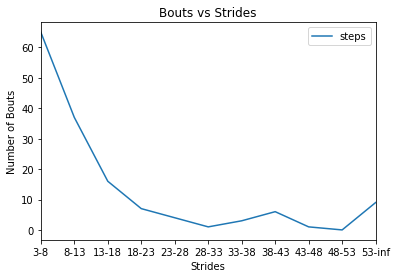

In [53]:
# Create a plot of the counts
counts.plot()
plt.xticks(np.arange(0,len(counts.index.tolist())),counts.index.tolist())
plt.xlabel('Strides')
plt.ylabel('Number of Bouts')
plt.title('Bouts vs Strides')
plt.show()